# Introduction to Linear Regression

---

---

**Def::** Linear regression is technique used to regress a line (since linear) over a set of input variates.

---

**Equations::**

> Matrix form: ${Y = W^T*X + B}$
>
>Algebraic form: ${y = mx + c}$

---

**Techniques** of linear regression::

>1. Using Co-efficient of Regressions
>
>2. Using Machine Learning

---

**Question Statements:**
1. A program for linear regression model using ML
2. A program for linear regression model using scikit-learn but no machine learning
3. A program without using scikit-learn or machine learning for Linear regression
4. Answer the following question : What do the Coefficients of Regression signify? Research and Answer in not more than 100 words.

---


### Dataset and Imports


In [40]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Load the Advertising Data
url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
data = pd.read_csv(url)

print(data.head())

   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


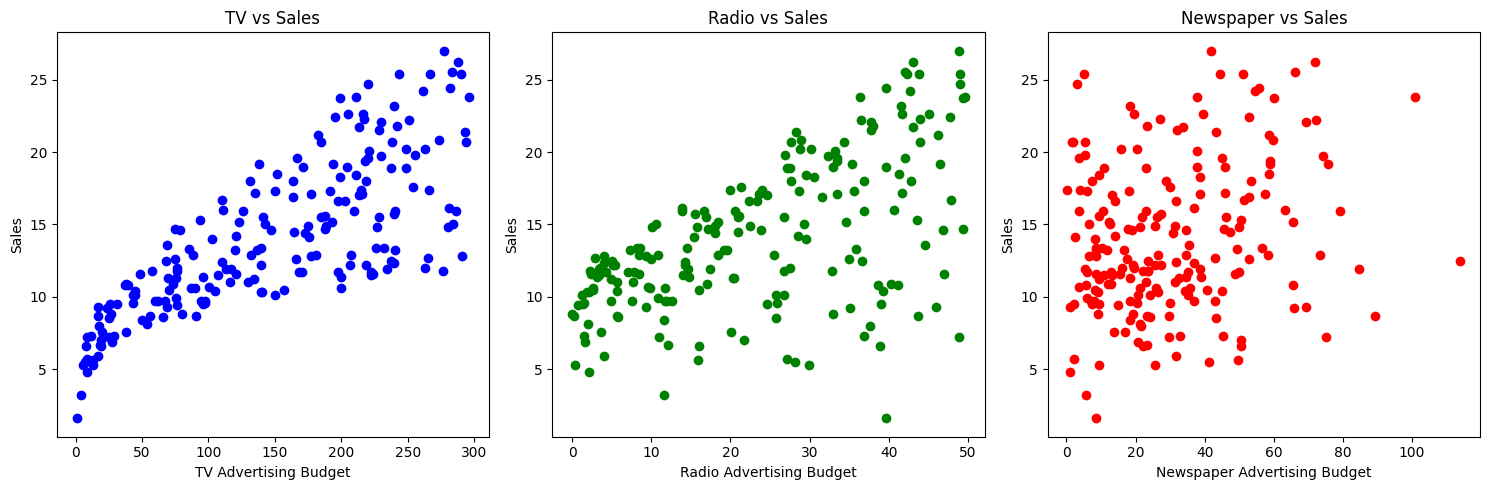

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot of TV advertising budget vs Sales
axes[0].scatter(data['TV'], data['sales'], color='blue')
axes[0].set_xlabel('TV Advertising Budget')
axes[0].set_ylabel('Sales')
axes[0].set_title('TV vs Sales')

# Scatter plot of Radio advertising budget vs Sales
axes[1].scatter(data['radio'], data['sales'], color='green')
axes[1].set_xlabel('Radio Advertising Budget')
axes[1].set_ylabel('Sales')
axes[1].set_title('Radio vs Sales')

# Scatter plot of Newspaper advertising budget vs Sales
axes[2].scatter(data['newspaper'], data['sales'], color='red')
axes[2].set_xlabel('Newspaper Advertising Budget')
axes[2].set_ylabel('Sales')
axes[2].set_title('Newspaper vs Sales')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

#### Analysis from raw data

> There is possibility of linear relation between TV vs Sales more that its competitors.

For my study, I will use **all** to show the relation.

## 1. Linear Regression Model using Machine Learning

---

**Uses::** scikit-learn, tensorflow



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 371.3211 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 74.3395 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 87.2519 
Test Loss of TV model: 381.88934326171875
Test Loss of Radio model: 77.96293640136719
Test Loss of Newspaper model: 89.30384826660156


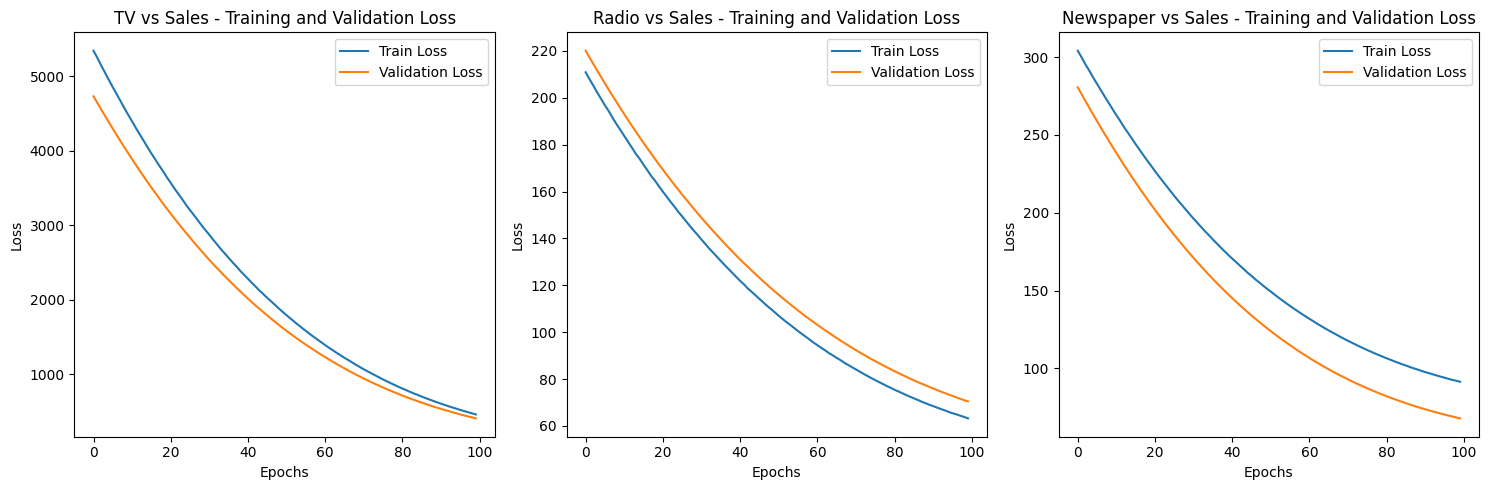

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


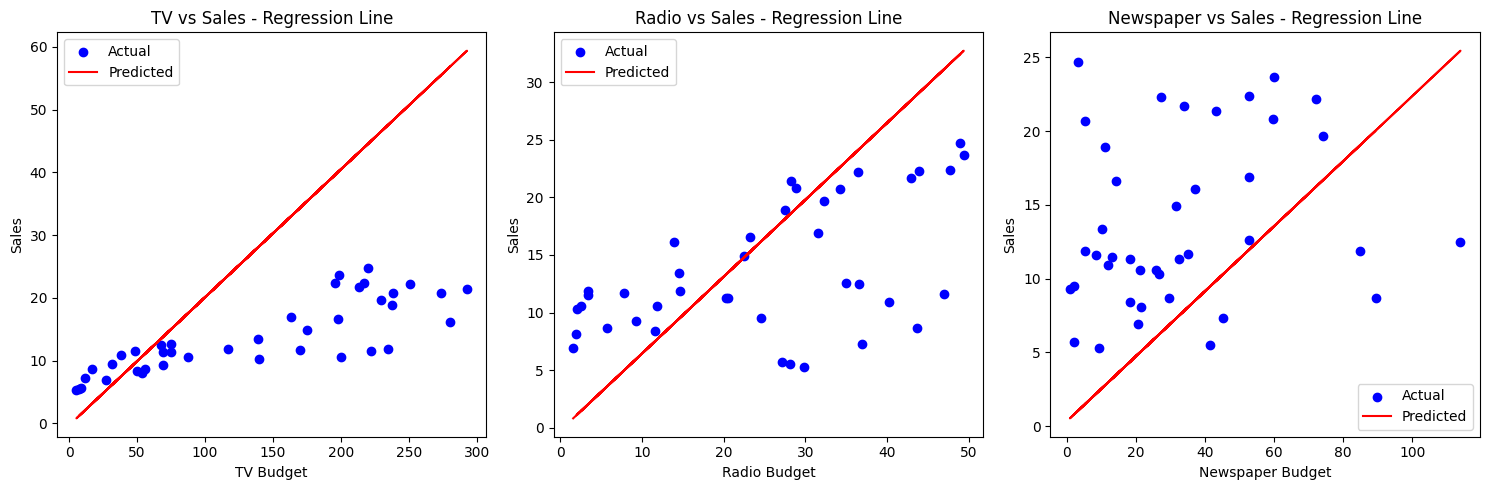

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Load the Advertising Data
url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
data = pd.read_csv(url)

# Prepare the data
X1 = data['TV'].values
X2 = data['radio'].values
X3 = data['newspaper'].values
y = data['sales'].values

# Split the data
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
X2_train, X2_test, _, _ = train_test_split(X2, y, test_size=0.2, random_state=42)
X3_train, X3_test, _, _ = train_test_split(X3, y, test_size=0.2, random_state=42)

# Define the models
model1 = tf.keras.Sequential([
    # tf.keras.layers.Dense(128, input_shape=(1,)),
    tf.keras.layers.Dense(1, input_shape=(1,))
])
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
    # tf.keras.layers.Dense(1, input_shape=(X2_train.shape[1],))
])
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
    # tf.keras.layers.Dense(1, input_shape=(X3_train.shape[1],))
])

# Compile the models
model1.compile(optimizer='adam', loss='mean_squared_error')
model2.compile(optimizer='adam', loss='mean_squared_error')
model3.compile(optimizer='adam', loss='mean_squared_error')

# Train the models
history1 = model1.fit(X1_train, y_train, epochs=100, validation_split=0.2, verbose=0)
history2 = model2.fit(X2_train, y_train, epochs=100, validation_split=0.2, verbose=0)
history3 = model3.fit(X3_train, y_train, epochs=100, validation_split=0.2, verbose=0)

# Evaluate the models
loss1 = model1.evaluate(X1_test, y_test)
loss2 = model2.evaluate(X2_test, y_test)
loss3 = model3.evaluate(X3_test, y_test)

print(f"Test Loss of TV model: {loss1}")
print(f"Test Loss of Radio model: {loss2}")
print(f"Test Loss of Newspaper model: {loss3}")

# Plot training and validation loss
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Training plot for TV advertising budget vs Sales
axes[0].plot(history1.history['loss'], label='Train Loss')
axes[0].plot(history1.history['val_loss'], label='Validation Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].set_title('TV vs Sales - Training and Validation Loss')

# Training plot for Radio advertising budget vs Sales
axes[1].plot(history2.history['loss'], label='Train Loss')
axes[1].plot(history2.history['val_loss'], label='Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].set_title('Radio vs Sales - Training and Validation Loss')

# Training plot for Newspaper advertising budget vs Sales
axes[2].plot(history3.history['loss'], label='Train Loss')
axes[2].plot(history3.history['val_loss'], label='Validation Loss')
axes[2].set_xlabel('Epochs')
axes[2].set_ylabel('Loss')
axes[2].legend()
axes[2].set_title('Newspaper vs Sales - Training and Validation Loss')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Plot the regression lines
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Regression plot for TV advertising budget vs Sales
y_pred1 = model1.predict(X1_test)
axes[0].scatter(X1_test, y_test, color='blue', label='Actual')
axes[0].plot(X1_test, y_pred1, color='red', label='Predicted')
axes[0].set_xlabel('TV Budget')
axes[0].set_ylabel('Sales')
axes[0].legend()
axes[0].set_title('TV vs Sales - Regression Line')

# Regression plot for Radio advertising budget vs Sales
y_pred2 = model2.predict(X2_test)
axes[1].scatter(X2_test, y_test, color='blue', label='Actual')
axes[1].plot(X2_test, y_pred2, color='red', label='Predicted')
axes[1].set_xlabel('Radio Budget')
axes[1].set_ylabel('Sales')
axes[1].legend()
axes[1].set_title('Radio vs Sales - Regression Line')

# Regression plot for Newspaper advertising budget vs Sales
y_pred3 = model3.predict(X3_test)
axes[2].scatter(X3_test, y_test, color='blue', label='Actual')
axes[2].plot(X3_test, y_pred3, color='red', label='Predicted')
axes[2].set_xlabel('Newspaper Budget')
axes[2].set_ylabel('Sales')
axes[2].legend()
axes[2].set_title('Newspaper vs Sales - Regression Line')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## 2. Linear Regression Model using Scikit-learn (with no ML libraries)

---

**Uses::** scikit-learn

Mean Squared Error of TV model: 10.204654118800956
Mean Squared Error of Radio model: 23.248766588129108
Mean Squared Error of Newspaper model: 30.620733995242563


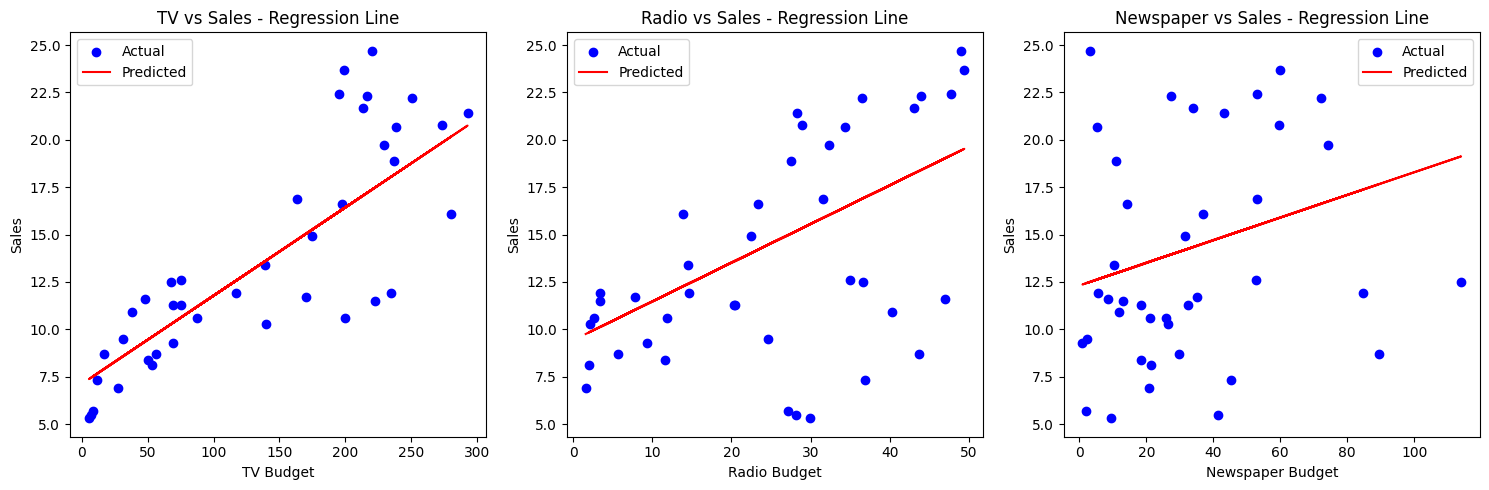

In [43]:
# Prepare the data
X1 = data[['TV']].values
X2 = data[['radio']].values
X3 = data[['newspaper']].values
y = data['sales'].values

# Split the data
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
X2_train, X2_test, _, _ = train_test_split(X2, y, test_size=0.2, random_state=42)
X3_train, X3_test, _, _ = train_test_split(X3, y, test_size=0.2, random_state=42)

# Define the models
model1 = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()

# Train the models
model1.fit(X1_train, y_train)
model2.fit(X2_train, y_train)
model3.fit(X3_train, y_train)

# Predict and evaluate the models
y_pred1 = model1.predict(X1_test)
y_pred2 = model2.predict(X2_test)
y_pred3 = model3.predict(X3_test)

mse1 = mean_squared_error(y_test, y_pred1)
mse2 = mean_squared_error(y_test, y_pred2)
mse3 = mean_squared_error(y_test, y_pred3)

print(f"Mean Squared Error of TV model: {mse1}")
print(f"Mean Squared Error of Radio model: {mse2}")
print(f"Mean Squared Error of Newspaper model: {mse3}")

# Plot the training loss
# Note: `scikit-learn` doesn't provide training loss directly like TensorFlow.

# Plot the regression lines
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Regression plot for TV advertising budget vs Sales
axes[0].scatter(X1_test, y_test, color='blue', label='Actual')
axes[0].plot(X1_test, y_pred1, color='red', label='Predicted')
axes[0].set_xlabel('TV Budget')
axes[0].set_ylabel('Sales')
axes[0].legend()
axes[0].set_title('TV vs Sales - Regression Line')

# Regression plot for Radio advertising budget vs Sales
axes[1].scatter(X2_test, y_test, color='blue', label='Actual')
axes[1].plot(X2_test, y_pred2, color='red', label='Predicted')
axes[1].set_xlabel('Radio Budget')
axes[1].set_ylabel('Sales')
axes[1].legend()
axes[1].set_title('Radio vs Sales - Regression Line')

# Regression plot for Newspaper advertising budget vs Sales
axes[2].scatter(X3_test, y_test, color='blue', label='Actual')
axes[2].plot(X3_test, y_pred3, color='red', label='Predicted')
axes[2].set_xlabel('Newspaper Budget')
axes[2].set_ylabel('Sales')
axes[2].legend()
axes[2].set_title('Newspaper vs Sales - Regression Line')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## 3. Linear Regression Model without using Scikit-learn or ML Libraries

---

### A. Using Machine Learning

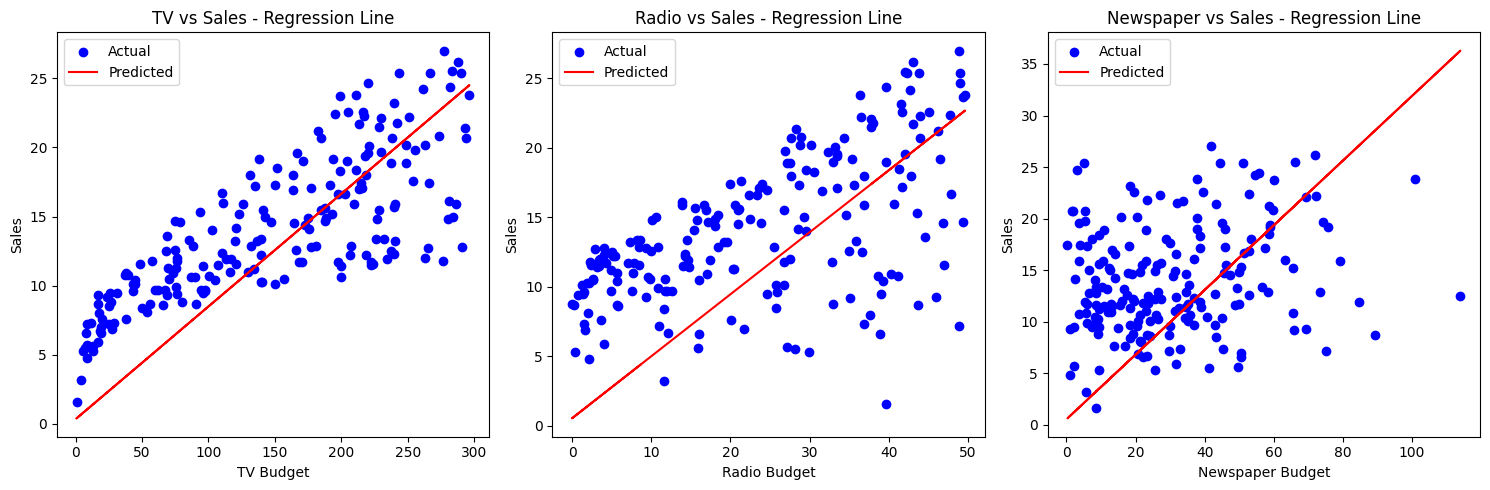

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def update_weights(x, y, w, b, lr, m_w, v_w, m_b, v_b, t, beta1=0.9, beta2=0.999, epsilon=1e-8):
    """
    Update weights and bias using the Adam optimizer.
    """
    n = len(x)
    x = x.flatten()

    # Compute gradients
    predictions = w * x + b
    d_w = -2 * np.sum(x * (y - predictions))
    d_b = -2 * np.sum(y - predictions)

    # Update moving averages of the gradients
    m_w = beta1 * m_w + (1 - beta1) * d_w
    v_w = beta2 * v_w + (1 - beta2) * (d_w ** 2)
    m_b = beta1 * m_b + (1 - beta1) * d_b
    v_b = beta2 * v_b + (1 - beta2) * (d_b ** 2)

    # Compute bias-corrected estimates
    m_w_hat = m_w / (1 - beta1 ** t)
    v_w_hat = v_w / (1 - beta2 ** t)
    m_b_hat = m_b / (1 - beta1 ** t)
    v_b_hat = v_b / (1 - beta2 ** t)

    # Update weights and bias
    w -= lr * m_w_hat / (np.sqrt(v_w_hat) + epsilon)
    b -= lr * m_b_hat / (np.sqrt(v_b_hat) + epsilon)

    return w, b, m_w, v_w, m_b, v_b

def loss_fn(x, y, w, b):
    """
    Calculate mean squared error loss.
    """
    n = len(x)
    x = x.flatten()
    predictions = w * x + b
    e = np.sum((y - predictions) ** 2)
    return e / n

def pred(x, w, b):
    """
    Prediction function.
    """
    return w * x + b

def training(x, y, w, b, lr, epochs):
    """
    Train the model and record loss history.
    """
    loss_history = []

    # Initialize Adam optimizer variables
    m_w = 0
    v_w = 0
    m_b = 0
    v_b = 0

    for t in range(1, epochs + 1):
        w, b, m_w, v_w, m_b, v_b = update_weights(x, y, w, b, lr, m_w, v_w, m_b, v_b, t)
        loss = loss_fn(x, y, w, b)
        loss_history.append(loss)

        # if t % 10 == 0:
        #     print(f"epoch={t}    weight={w:.4f}    bias={b:.4f}    cost={loss:.4f}")

    return w, b, loss_history

# Prepare the data
url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
data = pd.read_csv(url)

tv = data['TV'].values
radio = data['radio'].values
newspaper = data['newspaper'].values
sales = data['sales'].values
inputs = [tv, radio, newspaper]
titles = ['TV', 'Radio', 'Newspaper']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, x in enumerate(inputs):
    weight = 0
    bias = 0
    lr = 0.005  # Learning rate
    epochs = 150
    w, b, loss_history = training(x, sales, weight, bias, lr, epochs)

    # Predict y values
    y_pred = pred(x, w, b)

    # Plot
    axes[i].scatter(x, sales, color='blue', label='Actual')
    axes[i].plot(x, y_pred, color='red', label='Predicted')
    axes[i].set_xlabel(f'{titles[i]} Budget')
    axes[i].set_ylabel('Sales')
    axes[i].legend()
    axes[i].set_title(f'{titles[i]} vs Sales - Regression Line')

# Adjust layout
plt.tight_layout()
plt.show()


### B. Using Co-efficient of Regression

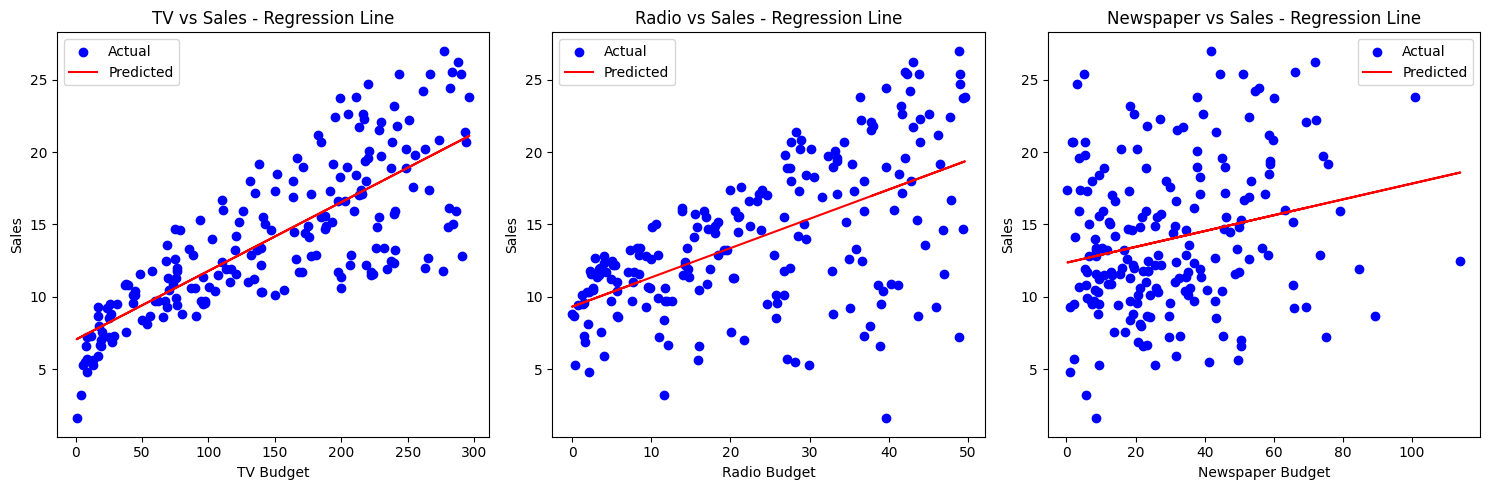

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def calculate_coefficients(x, y):
    """
    Calculate the slope and intercept for linear regression manually.
    """
    # Flatten x to be a 1D array
    x = x.flatten()

    # Mean of x and y
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    # Calculating coefficients
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean) ** 2)
    slope = numerator / denominator
    intercept = y_mean - slope * x_mean

    return slope, intercept

def predict(x, slope, intercept):
    """
    Predict y values using the slope and intercept.
    """
    return slope * x + intercept

# Prepare the data
url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
data = pd.read_csv(url)

tv = data['TV'].values
radio = data['radio'].values
newspaper = data['newspaper'].values
sales = data['sales'].values
inputs = [tv, radio, newspaper]
titles = ['TV', 'Radio', 'Newspaper']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, x in enumerate(inputs):
    # Calculate coefficients
    slope, intercept = calculate_coefficients(x, sales)

    # Predict y values
    y_pred = predict(x, slope, intercept)

    # Plot
    axes[i].scatter(x, sales, color='blue', label='Actual')
    axes[i].plot(x, y_pred, color='red', label='Predicted')
    axes[i].set_xlabel(f'{titles[i]} Budget')
    axes[i].set_ylabel('Sales')
    axes[i].legend()
    axes[i].set_title(f'{titles[i]} vs Sales - Regression Line')

# Adjust layout
plt.tight_layout()
plt.show()


## 4. What Do the Coefficients of Regression Signify?

The coefficients in a linear regression model represent the estimated change in the dependent variable for a one-unit change in the corresponding independent variable, holding all other variables constant. Specifically, in the context of the California housing dataset, each coefficient signifies how much the median house value is expected to change with a one-unit change in a specific feature (e.g., median income or average rooms per dwelling). The intercept represents the predicted value of the dependent variable when all independent variables are zero.